# Problem Statement :                                                                                                            Ola Electric, a prominent player in the electric vehicle (EV) industry in India, is planning to open a new showroom to showcase its latest lineup of electric vehicles. As a data analyst, your task is to create a comprehensive forecasting model that predicts EV sales and adoption trends in India, specifically focusing on Ola Electric's showroom.

# 
1) Minimize:

Operational Costs: Minimize the operational costs associated with running the showroom, including staffing, maintenance, and utilities, to maximize profitability.

Customer Acquisition Costs: Minimize the costs associated with acquiring new customers for Ola Electric's EVs. This includes marketing expenses, promotional costs, and other customer acquisition-related expenditures.

Call Drop Rates: Minimize the call drop rates for customer inquiries or support calls related to the showroom. A seamless communication process is essential for customer satisfaction and building trust.

2) Maximize:

Showroom Footfall: Maximize the number of visitors to the showroom by implementing effective marketing strategies, promotions, and events to create awareness and attract potential customers.

Conversion Rates: Maximize the conversion rates of showroom visitors to actual EV sales. Implement sales and marketing tactics that encourage potential customers to make a purchase decision during their showroom visit.

Customer Satisfaction Index: Maximize the customer satisfaction index by providing an excellent showroom experience, offering informative product demonstrations, and addressing customer inquiries and concerns effectively.

3) Business Constraints:

Budgetary Limits: Recognize budgetary constraints and ensure that the forecasting model operates within the allocated budget for the showroom's operations and marketing activities.

Environmental Impact: Acknowledge and adhere to any environmental regulations or sustainability goals. Ensure that business operations align with Ola Electric's commitment to environmental responsibility.

Competitive Market Dynamics: Consider competitive pricing limits and market dynamics. While maximizing sales, avoid aggressive pricing strategies that may negatively impact profitability or compromise the perceived value of Ola Electric's EVs.

Resource Availability: Take into account constraints related to resource availability, such as the availability of skilled staff for the showroom, inventory constraints, and limitations in the availability of charging infrastructure.

Regulatory Compliance: Adhere to all regulatory constraints and compliance requirements related to operating a showroom, including licensing, safety standards, and other legal considerations.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df =pd.read_csv('ev_sales.csv')

In [7]:
df.head()

,Month,Ev Sales Data per Month
0,1946-03,596.714153
1,1946-04,2511.022197
2,1946-05,5176.388554
3,1946-06,6770.889351
4,1946-07,4393.119638


In [8]:
df.tail()

,Month,Ev Sales Data per Month
929,2023-08,62731.0
930,2023-09,63990.0
931,2023-10,74749.0
932,NaN,NaN
933,NaN,0.0


In [9]:
#Drop last 2 row

In [10]:
df.drop(932,axis=0,inplace=True)

In [11]:
df.drop(933,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Ev Sales Data per Month
927,2023-06,46064.0
928,2023-07,54584.0
929,2023-08,62731.0
930,2023-09,63990.0
931,2023-10,74749.0


In [13]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1946-03,596.714153
1,1946-04,2511.022197
2,1946-05,5176.388554
3,1946-06,6770.889351
4,1946-07,4393.119638


In [14]:
#convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1946-03-01,596.714153
1,1946-04-01,2511.022197
2,1946-05-01,5176.388554
3,1946-06-01,6770.889351
4,1946-07-01,4393.119638


In [16]:
df.set_index('Month', inplace=True)

In [17]:
df.head()

,Sales
Month,
1946-03-01,596.714153
1946-04-01,2511.022197
1946-05-01,5176.388554
1946-06-01,6770.889351
1946-07-01,4393.119638


In [18]:
df.isnull().sum()

Sales    0
dtype: int64

In [19]:
df.describe()

,Sales
count,932.000000
mean,23571.235261
std,14533.661846
min,10.695673
25%,11428.684832
50%,23342.506260
75%,34617.334315
max,105539.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932 entries, 1946-03-01 to 2023-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   932 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB


<Axes: xlabel='Month'>

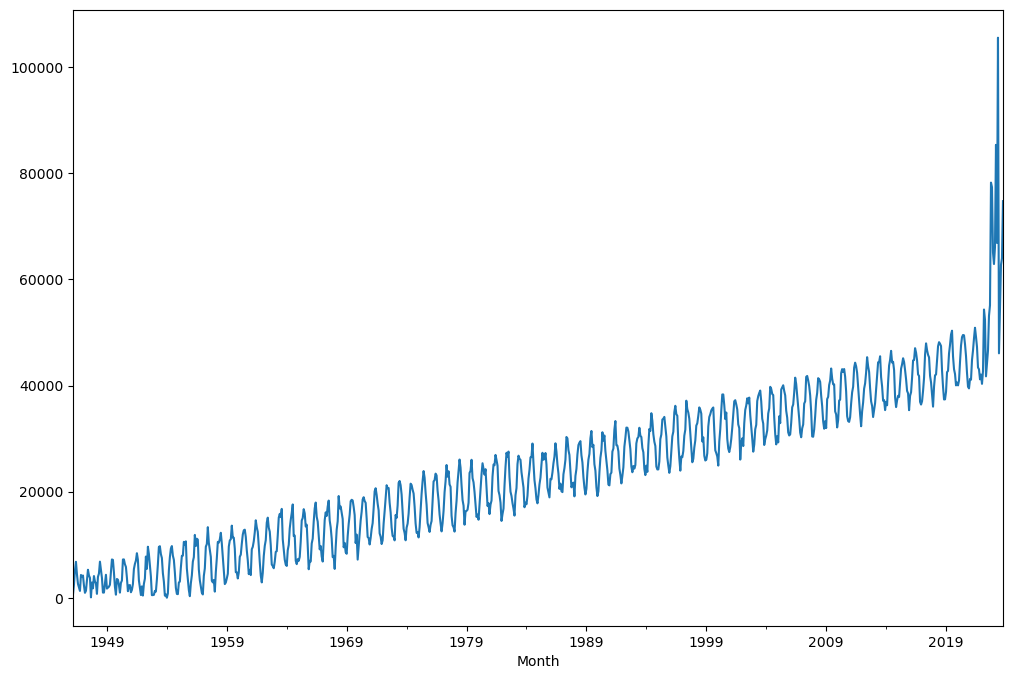

In [21]:
df['Sales'].plot(figsize=(12,8))

In [22]:
import matplotlib.pyplot as plt 


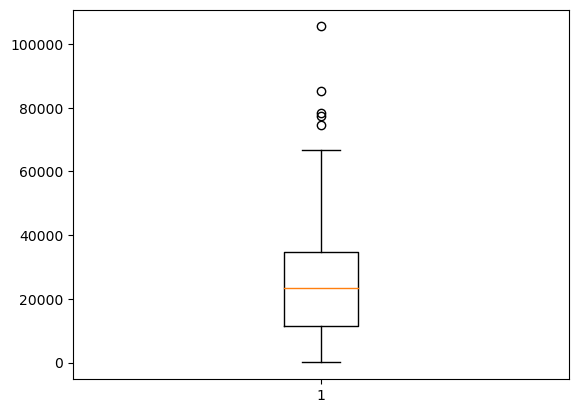

In [23]:
plt.boxplot(df['Sales'])
plt.show();

{'whiskers': [<matplotlib.lines.Line2D at 0x23430e03850>,
 'caps': [<matplotlib.lines.Line2D at 0x23430e0a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x23430e02a50>],
 'medians': [<matplotlib.lines.Line2D at 0x23430e0b650>],
 'fliers': [<matplotlib.lines.Line2D at 0x23430e0ab10>],
 'means': []}

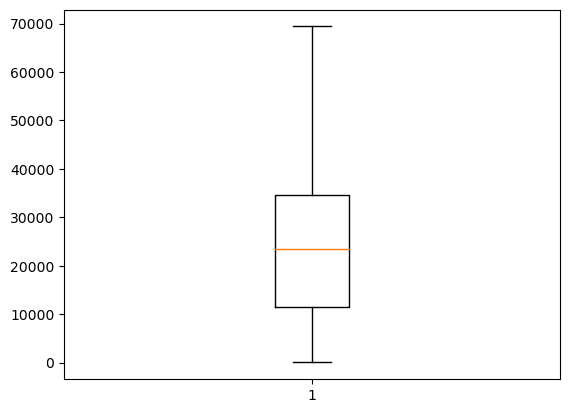

In [24]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['Sales'])
#copy Winsorizer and paste in help tab of 
# top right window study the method
#
df_t=winsor.fit_transform(df[['Sales']])
#sns.boxplot(df['Sales'])
plt.boxplot(df_t['Sales'])

In [25]:
df_t.tail(7)

,Sales
Month,
2023-04-01,66870.000000
2023-05-01,69400.308539
2023-06-01,46064.000000
2023-07-01,54584.000000
2023-08-01,62731.000000
2023-09-01,63990.000000
2023-10-01,69400.308539


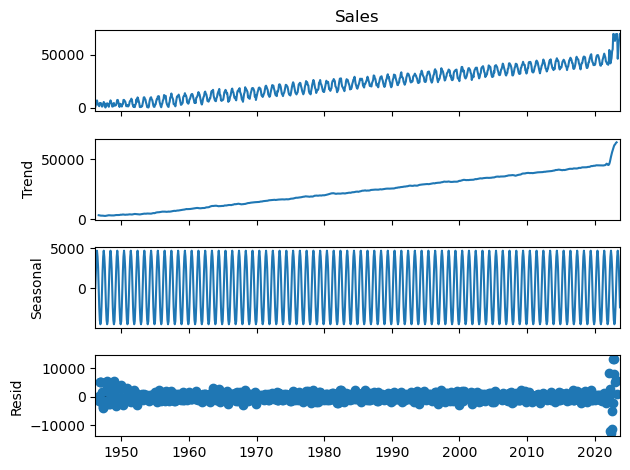

In [26]:
result =seasonal_decompose(df_t['Sales'],model='add')
result.plot();

<Axes: xlabel='Month'>

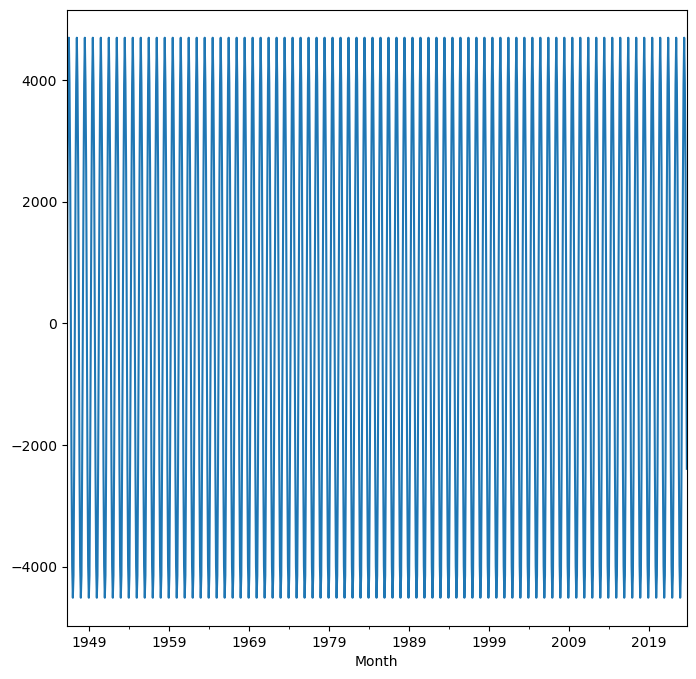

In [27]:
result.seasonal.plot(figsize=(8,8))

In [28]:
auto_arima(df_t['Sales'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  932
Model:             SARIMAX(3, 1, 3)x(2, 0, [1], 12)   Log Likelihood               -8333.536
Date:                              Mon, 26 Feb 2024   AIC                          16689.073
Time:                                      10:45:28   BIC                          16742.271
Sample:                                  03-01-1946   HQIC                         16709.362
                                       - 10-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    176.3564     77.105      2.287      0.022      25.234     327.478
ar.L1         -1.4402      0.056    -25.664      0.000      -1.550      -1.330
ar.L2         -0.4067      0.096     -4.215      0.000      -0.596      -0.218
ar.L3          0.3026      0.055      5.458      0.000       0.194       0.411
ma.L1          1.0420      0.046     22.881      0.000       0.953       1.131
ma.L2         -0.2721      0.075     -3.618      0.000      -0.420      -0.125
ma.L3         -0.6962      0.042    -16.611      0.000      -0.778      -0.614
ar.S.L12       0.7799      0.158      4.929      0.000       0.470       1.090
ar.S.L24       0.1390      0.133      1.045      0.296      -0.122       0.400
ma.S.L12      -0.3732      0.167     -2.228      0.026      -0.701      -0.045
sigma2      4.108e+06      0.015    2.7e+08      0.000    4.11e+06    4.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             70515.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.26   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.26e+22. Standard errors may be unstable.
"""

In [29]:
len(df)

932

In [30]:
train=df.iloc[:800]

In [31]:
test =df.iloc[800:]

In [32]:
model =SARIMAX(train['Sales'],order=(3,1,3),seasonal_order=(2,0,[1],12))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
result=model.fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                  800
Model:             SARIMAX(3, 1, 3)x(2, 0, [1], 12)   Log Likelihood               -6836.360
Date:                              Mon, 26 Feb 2024   AIC                          13692.721
Time:                                      11:14:46   BIC                          13739.555
Sample:                                  03-01-1946   HQIC                         13710.713
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1038      0.064      1.631      0.103      -0.021       0.228
ar.L2          0.9892      0.021     46.647      0.000       0.948       1.031
ar.L3         -0.0930      0.065     -1.438      0.150      -0.220       0.034
ma.L1         -0.9555      0.030    -31.637      0.000      -1.015      -0.896
ma.L2         -0.9980      0.010    -97.485      0.000      -1.018      -0.978
ma.L3          0.9557      0.031     30.865      0.000       0.895       1.016
ar.S.L12       1.0578      0.089     11.874      0.000       0.883       1.232
ar.S.L24      -0.0607      0.088     -0.688      0.491      -0.233       0.112
ma.S.L12      -0.7683      0.062    -12.353      0.000      -0.890      -0.646
sigma2       2.34e+06   3.72e-09   6.29e+14      0.000    2.34e+06    2.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.81   Prob(JB):                         0.55
Heteroskedasticity (H):               0.73   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+31. Standard errors may be unstable.
"""

In [35]:
start =len(train)

In [36]:
end=len(train)+len(test)-1

In [37]:
predictions=result.predict(start,end,typ='levels').rename('SARIMA Predictions')

<Axes: xlabel='Month'>

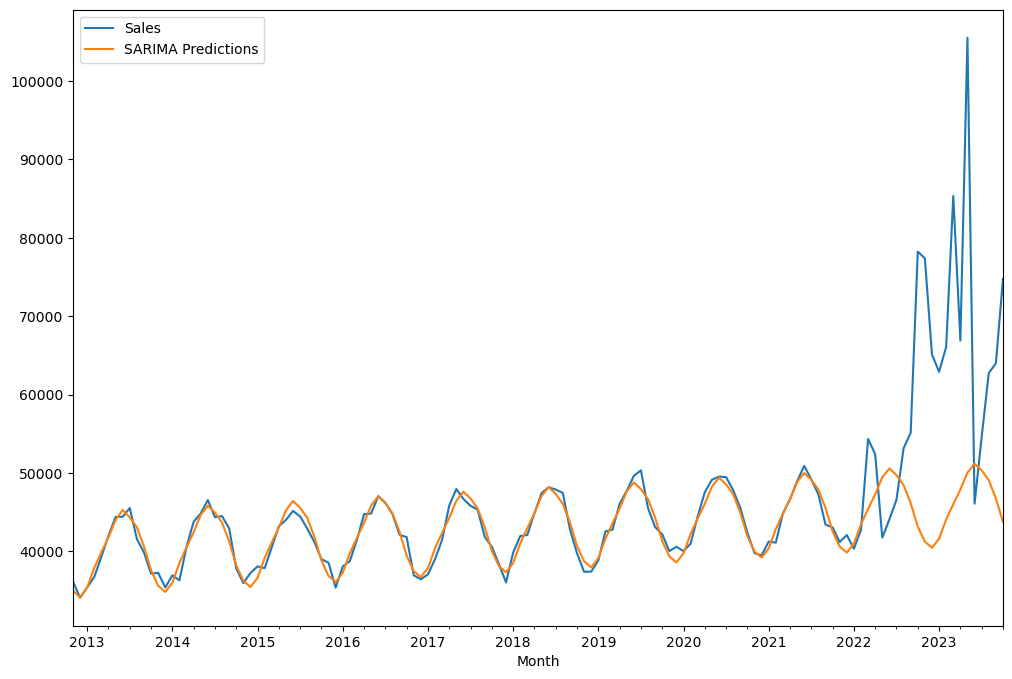

In [38]:
test['Sales'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [39]:
from statsmodels.tools.eval_measures import rmse

In [40]:
error =rmse(test['Sales'],predictions)

In [41]:
error

9128.53305502407

In [42]:
test['Sales'].mean()

45461.11631954545

# FORECAST INTO THE UNKNOWN FUTURE

In [43]:
model =SARIMAX(df_t['Sales'],order=(3,1,3),seasonal_order=(2,0,[1],12))
result=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
fcast=result.predict(len(df_t),len(df_t)+48
                     ,typ='levels').rename('SARIMA FORECAST')

In [50]:
fcast

2023-11-01    65923.962100
2023-12-01    63401.017767
2024-01-01    62850.678161
2024-02-01    64664.773573
2024-03-01    67795.696515
2024-04-01    68445.999593
2024-05-01    69368.818437
2024-06-01    63431.884689
2024-07-01    65697.060533
2024-08-01    67635.590951
2024-09-01    66551.861297
2024-10-01    68004.860790
2024-11-01    65757.335245
2024-12-01    64449.218021
2025-01-01    64627.195609
2025-02-01    66406.119674
2025-03-01    69591.590633
2025-04-01    70845.110756
2025-05-01    71508.258329
2025-06-01    68646.735987
2025-07-01    69817.347838
2025-08-01    70671.339781
2025-09-01    69188.871821
2025-10-01    69949.206223
2025-11-01    67929.601629
2025-12-01    66843.983042
2026-01-01    67147.690464
2026-02-01    68912.719817
2026-03-01    72088.233090
2026-04-01    73441.978826
2026-05-01    74056.140957
2026-06-01    71749.778581
2026-07-01    72723.215759
2026-08-01    73386.610462
2026-09-01    71844.259962
2026-10-01    72482.650607
2026-11-01    70515.375483
2

<Axes: xlabel='Month'>

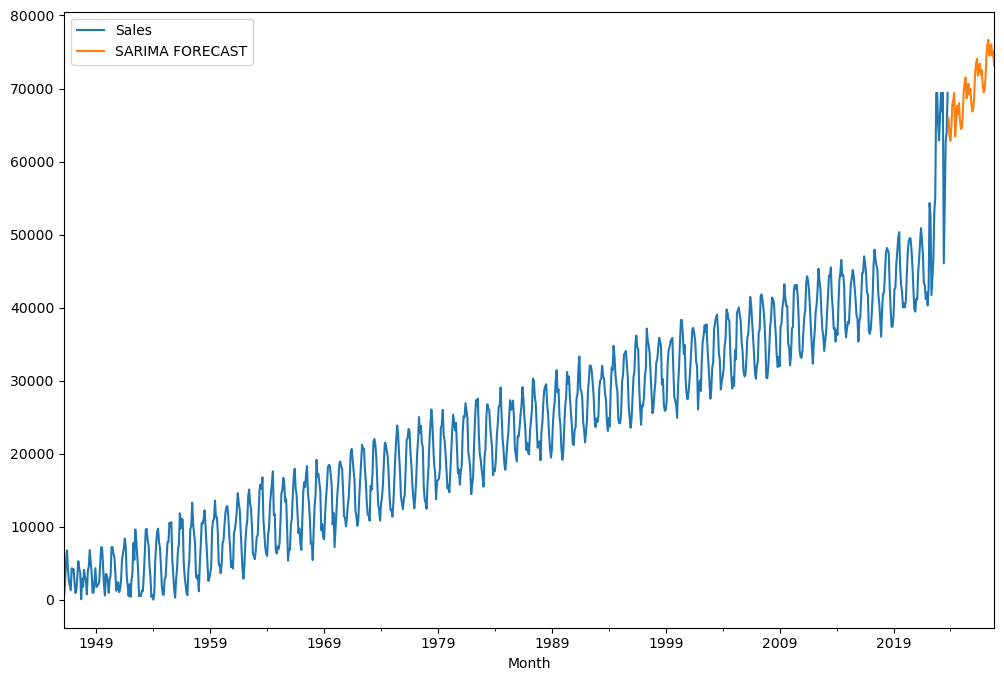

In [51]:
df_t['Sales'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [52]:
import pickle

In [53]:
result.save('sarima_model.pkl')